In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
ииииииииии
Mounted at /content/gdrive


In [0]:
import pandas as pd


In [0]:
data_sets= []
data_sets.append(pd.read_csv("/content/gdrive/My Drive/a/2013.csv", encoding="ISO-8859-1"))
data_sets.append(pd.read_csv("/content/gdrive/My Drive/a/2012.csv", encoding="ISO-8859-1"))

In [0]:
data_sets[1].head(4)

,Reference Number,Easting,Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle,Holiday
0,120033394,430536,433129,1,1/22/2012,255,Unclassified,Dry,Darkness: street lighting unknown,Fine without high winds,Pedestrian,Serious,Female,28,Car,False
1,120034263,427301,434682,2,1/23/2012,800,A,Wet / Damp,Daylight: street lights present,Raining without high winds,Driver,Slight,Male,19,Motorcycle over 50cc and up to 125cc,False
2,120034970,422201,433910,1,1/23/2012,1345,B,Dry,Daylight: street lights present,Fine without high winds,Pedestrian,Serious,Female,73,Car,False
3,120035568,428891,431676,1,1/24/2012,117,Unclassified,Wet / Damp,Darkness: street lights present and lit,Fine without high winds,Driver,Serious,Male,19,Car,False


In [0]:
data_sets[1].isnull().sum()

Reference Number         0
Easting                  0
Northing                 0
Number of Vehicles       0
Accident Date            0
Time (24hr)              0
1st Road Class           0
Road Surface             0
Lighting Conditions      0
Weather Conditions       0
Casualty Class           0
Casualty Severity        0
Sex of Casualty          0
Age of Casualty          0
Type of Vehicle          0
Holiday                315
dtype: int64

In [0]:
def_rows = ['time', 'year', 'day', 'month','Road Surfce','lighting_conditions', 'Easting']

In [0]:
data_sets[1]['Road Surface'].unique()
data_sets[0]['Road Surface'].unique()

array(['Dry', 'Frost / Ice', 'Wet / Damp', 'Snow'], dtype=object)

In [0]:
data_sets[1]['Lighting Conditions'].unique()

array(['Darkness: street lighting unknown',
       'Daylight: street lights present',
       'Darkness: street lights present and lit',
       'Darkness: no street lighting', '5'], dtype=object)

In [0]:
data_sets[1]['Weather Conditions'].unique()

array(['Fine without high winds', 'Raining without high winds',
       'Raining with high winds', 'Fine with high winds',
       'Snowing without high winds', 'Other', 'Unknown',
       'Fog or mist \x96 if hazard'], dtype=object)

In [0]:
def_rows = ['City', 'Road Surface', 'Lighting Conditions', 'Holiday', 'Weather Conditions']
data_sets[0]['Road Surface'] = data_sets[0]['Road Surface'].apply(lambda x: 'Wet / Damp' if x=='Snow' else x)
data_sets[1]['Road Surface'] = data_sets[1]['Road Surface'].apply(lambda x: 'Wet / Damp' if x=='Snow' else x)

data_sets[0]['Road Surface'] = data_sets[0]['Road Surface'].apply(lambda x: 'Dry' if x=='5' else x)
data_sets[1]['Road Surface'] = data_sets[1]['Road Surface'].apply(lambda x: 'Dry' if x=='5' else x)

data_sets[0]['Lighting Conditions'] = data_sets[0]['Lighting Conditions'].apply(lambda x: 'Darkness: no street lighting' if x=='5' else x)
data_sets[1]['Lighting Conditions'] = data_sets[1]['Lighting Conditions'].apply(lambda x: 'Daylight: street lights present' if x=='5' else x)

In [0]:
cities = ["Akkaraipattu", "Ambalangoda", "Ampara", "Anuradhapura", "Badulla", "Balangoda", "Bandarawela", "Batticaloa", "Beruwala", "Boralesgamuwa", "Chavakachcheri", "Chilaw", "Colombo", "Dambulla", "Dehiwala-Mount Lavinia", "Embilipitiya", "Eravur", "Galle", "Gampaha", "Gampola", "Hambantota", "Haputale", "Hatton-Dickoya", "Hikkaduwa", "Horana", "Ja-Ela", "Jaffna", "Kadugannawa", "Kaduwela", "Kalmunai", "Kalutara", "Kandy", "Kattankudy", "Katunayake", "Kegalle", "Kesbewa", "Kilinochchi", "Kinniya", "Kolonnawa", "Kuliyapitiya", "Kurunegala", "Maharagama", "Mannar", "Matale", "Matara", "Minuwangoda", "Moneragala", "Moratuwa", "Mullaitivu", "Nawalapitiya", "Negombo", "Nuwara Eliya", "Panadura", "Peliyagoda", "Point Pedro", "Polonnaruwa", "Puttalam", "Ratnapura", "Seethawakapura", "Sri Jayawardenepura", "Tangalle", "Thalawakele-Lindula", "Trincomalee", "Valvettithurai", "Vavuniya", "Wattala-Mabole", "Wattegama", "Weligama"]
import random 

def random_cities(dataset):
  k = dataset.shape[0]
  selected_cities = []
  for i in range(0, k):
    selected_cities.append(cities[random.randint(0, len(cities)-1)])
  dataset['City'] = selected_cities
  return dataset

data_sets[0] = random_cities(data_sets[0])
data_sets[1] = random_cities(data_sets[1])

In [0]:
data_comb = pd.concat([data_sets[0] , data_sets[1]])
df = data_comb.groupby(by=def_rows).size().to_frame('No Accidents').reset_index()

In [0]:
df.head()

,City,Road Surface,Lighting Conditions,Holiday,Weather Conditions,No Accidents
0,Akkaraipattu,Dry,Darkness: no street lighting,False,Fine without high winds,1
1,Akkaraipattu,Dry,Darkness: street lighting unknown,False,Fine without high winds,13
2,Akkaraipattu,Dry,Darkness: street lights present and lit,False,Fine without high winds,6
3,Akkaraipattu,Dry,Daylight: street lights present,False,Fine without high winds,34
4,Akkaraipattu,Wet / Damp,Darkness: street lighting unknown,False,Raining without high winds,1


In [0]:
data_comb = data_comb.drop(columns=['Easting','Northing', "Type of Vehicle"])
data_comb.to_csv("/content/gdrive/My Drive/a/DataSet_v1.0.csv", index=False)

In [0]:
data_sets[0].head(4)

,Reference Number,Grid Ref: Easting,Grid Ref: Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Unnamed: 11,Casualty Severity,Sex of Casualty,Age of Casualty,Vehicle type,Holiday,City
0,130021591,426983,433434,3,1/15/2013,1545,Unclassified,Dry,Daylight: street lights present,Fine without high winds,1,Driver,Slight,Male,42,Car,False,Matara
1,130021629,424366,445442,2,1/15/2013,1640,A,Frost / Ice,Darkness: street lights present and lit,Other,2,Passenger,Slight,Female,78,Car,False,Peliyagoda
2,130021704,424481,435632,2,1/13/2013,1345,Unclassified,Wet / Damp,Daylight: street lights present,Fine without high winds,1,Driver,Serious,Male,34,Motorcycle over 125cc and up to 500cc,False,Embilipitiya
3,130022047,430284,432421,1,1/15/2013,1313,Unclassified,Dry,Daylight: street lights present,Fine without high winds,3,Pedestrian,Slight,Male,47,Car,False,Moratuwa


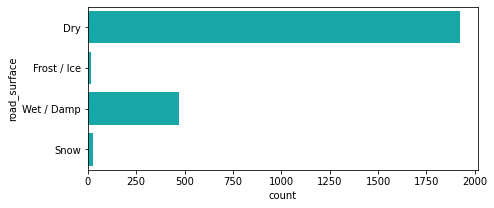

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="road_surface", data=dataframe, color="c");

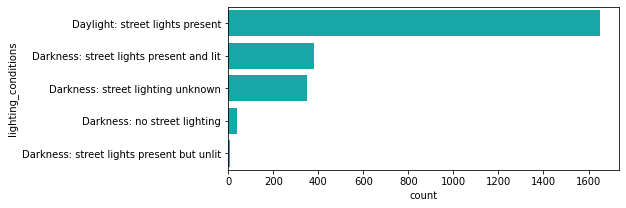

In [0]:

f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="lighting_conditions", data=dataframe, color="c");

In [0]:
dataframe.groupby(by="grid_ref_easting").size()

grid_ref_easting
414747    1
415274    2
416576    1
417892    1
417948    1
         ..
444753    1
444812    1
445376    3
445500    1
445576    1
Length: 1637, dtype: int64

In [0]:
print("grid_ref_northing bins :",len(dataframe['grid_ref_northing'].unique()))
print("grid_ref_easting bins :",len(dataframe['grid_ref_easting'].unique()))

grid_ref_northing bins : 1636
grid_ref_easting bins : 1637


In [0]:
easting_lowest = dataframe.sort_values(by='grid_ref_easting').reset_index()['grid_ref_easting'][0]
northing_lowest = dataframe.sort_values(by='grid_ref_northing').reset_index()['grid_ref_northing'][0]

easting_highest = dataframe.sort_values(by='grid_ref_easting').reset_index()['grid_ref_easting'][2432]
northing_highest = dataframe.sort_values(by='grid_ref_northing').reset_index()['grid_ref_northing'][2432]

easting_bins = [i for i in range(easting_lowest, easting_highest+4, 4)]
northing_bins = [i for i in range(northing_lowest, northing_highest+4, 4)]

dataframe['northing_binned'] = pd.cut(dataframe['grid_ref_northing'], northing_bins, include_lowest=True)
dataframe['easting_binned'] = pd.cut(dataframe['grid_ref_easting'], easting_bins, include_lowest=True)


In [0]:
easting_lowest

414747

In [0]:
dataframe.sort_values(by='grid_ref_easting')['grid_ref_easting']

2413    414747
1034    415274
1033    415274
897     416576
1564    417892
         ...  
1738    445376
1739    445376
399     445376
1311    445500
291     445576
Name: grid_ref_easting, Length: 2433, dtype: int64

In [0]:
dataframe.isnull().sum()

id                     0
reference_number       0
grid_ref_easting       0
grid_ref_northing      0
number_of_vehicles     0
time                   0
1st_road_class         0
road_surface           0
lighting_conditions    0
weather                0
casualty               0
class                  0
casualty_severity      0
sex_of_casualty        0
age_of_casualty        0
vehicle_type           0
year                   0
month                  0
day                    0
northing_binned        0
easting_binned         0
dtype: int64

In [0]:

f, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(dataframe.pivot(dataframe.groupby(['grid_ref_easting', 'grid_ref_northing']).size().unstack(fill_value=0)));

In [0]:
pd.crosstab(dataframe.grid_ref_easting,dataframe.grid_ref_northing)

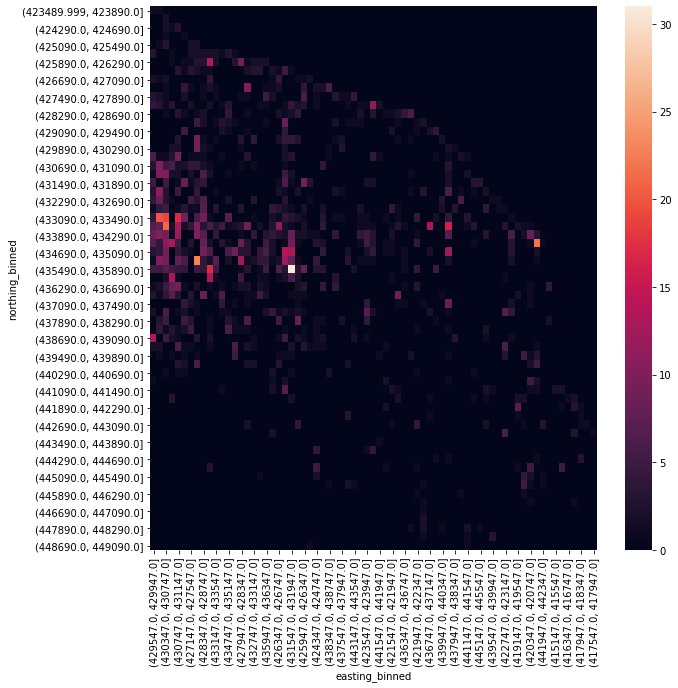

In [0]:

f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(dataframe.groupby(['northing_binned', 'easting_binned']).size().unstack(fill_value=0));

In [0]:
dataframe.sort_values(by='grid_ref_easting').reset_index()['grid_ref_easting']

0       414747
1       415274
2       415274
3       416576
4       417892
         ...  
2428    445376
2429    445376
2430    445376
2431    445500
2432    445576
Name: grid_ref_easting, Length: 2433, dtype: int64

In [0]:
easting_lowest = dataframe.sort_values(by='grid_ref_easting').reset_index()['grid_ref_easting'][0]
northing_lowest = dataframe.sort_values(by='grid_ref_northing').reset_index()['grid_ref_northing'][0]

easting_highest = dataframe.sort_values(by='grid_ref_easting').reset_index()['grid_ref_easting'][2432]
northing_highest = dataframe.sort_values(by='grid_ref_northing').reset_index()['grid_ref_northing'][2432]


In [0]:
easting_lowest,northing_lowest

(414747, 423490)

In [0]:
easting_highest,northing_highest

(445576, 449480)

In [0]:
414747- 423490

-8743

In [0]:
445576-449480

-3904

In [0]:
Latitude from 5.94851 to 9.81667 and longitude from 79.79528 to 81.84198.

In [0]:
def convert_northing(gri_ref_north):
  input_start = 423490
  input_end = 449480
  output_start = 5.94851
  output_end   = 9.81667
  output = output_start + ((output_end - output_start) / (input_end - input_start)) * (gri_ref_north - input_start)
  return output

def convert_easting(gri_ref_east):
  input_start = 414747
  input_end = 445576
  output_start = 79.79528
  output_end   = 81.84198
  output = output_start + ((output_end - output_start) / (input_end - input_start)) * (gri_ref_east - input_start)
  return output

In [0]:
dataframe['lat'] = dataframe['grid_ref_northing'].apply(convert_northing)
dataframe['long'] = dataframe['grid_ref_easting'].apply(convert_easting)

In [0]:
dataframe.head(4)

,id,reference_number,grid_ref_easting,grid_ref_northing,number_of_vehicles,time,1st_road_class,road_surface,lighting_conditions,weather,casualty,class,casualty_severity,sex_of_casualty,age_of_casualty,vehicle_type,year,month,day,northing_binned,easting_binned,lat,long
0,1,130021591,426983,433434,3,1545,Unclassified,Dry,Daylight: street lights present,Weather Conditions,1,Driver,Slight,Male,42,Car,13,Jan,15,"(433430.0, 433434.0]","(426979.0, 426983.0]",7.428502,80.607613
1,2,130021629,424366,445442,2,1640,A,Frost / Ice,Darkness: street lights present and lit,Weather Conditions,2,Passenger,Slight,Female,78,Car,13,Jan,15,"(445438.0, 445442.0]","(424363.0, 424367.0]",9.215684,80.433874
2,3,130021704,424481,435632,2,1345,Unclassified,Wet / Damp,Daylight: street lights present,Weather Conditions,1,Driver,Serious,Male,34,Motorcycle over 125cc and up to 500cc,13,Jan,13,"(435630.0, 435634.0]","(424479.0, 424483.0]",7.755636,80.441508
3,4,130022047,430284,432421,1,1313,Unclassified,Dry,Daylight: street lights present,Weather Conditions,3,Pedestrian,Slight,Male,47,Car,13,Jan,15,"(432418.0, 432422.0]","(430283.0, 430287.0]",7.277734,80.826763


In [0]:
#Bins for lat long
7.428983-7.435636

-0.00665300000000002

In [0]:
80.601508-80.607613

-0.006105000000005134

In [0]:
lat_lowest = dataframe.sort_values(by='lat').reset_index()['lat'][0]
long_lowest = dataframe.sort_values(by='long').reset_index()['long'][0]

lat_highest = dataframe.sort_values(by='lat').reset_index()['lat'][2432]
long_highest = dataframe.sort_values(by='long').reset_index()['long'][2432]

lat_bins = []
lat = lat_lowest
while lat<=lat_highest:
  lat_bins.append(lat)
  lat+= 0.006653

long_bins = []
long = long_lowest
while long<=long_highest:
  long_bins.append(long)
  long += 0.006105

dataframe['lat_binned'] = pd.cut(dataframe['lat'], lat_bins, include_lowest=True)
dataframe['long_binned'] = pd.cut(dataframe['long'], long_bins, include_lowest=True)


In [0]:
dataframe.head()

,id,reference_number,grid_ref_easting,grid_ref_northing,number_of_vehicles,time,1st_road_class,road_surface,lighting_conditions,weather,casualty,class,casualty_severity,sex_of_casualty,age_of_casualty,vehicle_type,year,month,day,northing_binned,easting_binned,lat,long,lat_binned,long_binned
0,1,130021591,426983,433434,3,1545,Unclassified,Dry,Daylight: street lights present,Weather Conditions,1,Driver,Slight,Male,42,Car,13,Jan,15,"(433430.0, 433434.0]","(426979.0, 426983.0]",7.428502,80.607613,"(7.425, 7.432]","(80.607, 80.613]"
1,2,130021629,424366,445442,2,1640,A,Frost / Ice,Darkness: street lights present and lit,Weather Conditions,2,Passenger,Slight,Female,78,Car,13,Jan,15,"(445438.0, 445442.0]","(424363.0, 424367.0]",9.215684,80.433874,"(9.215, 9.222]","(80.43, 80.436]"
2,3,130021704,424481,435632,2,1345,Unclassified,Wet / Damp,Daylight: street lights present,Weather Conditions,1,Driver,Serious,Male,34,Motorcycle over 125cc and up to 500cc,13,Jan,13,"(435630.0, 435634.0]","(424479.0, 424483.0]",7.755636,80.441508,"(7.751, 7.758]","(80.436, 80.442]"
3,4,130022047,430284,432421,1,1313,Unclassified,Dry,Daylight: street lights present,Weather Conditions,3,Pedestrian,Slight,Male,47,Car,13,Jan,15,"(432418.0, 432422.0]","(430283.0, 430287.0]",7.277734,80.826763,"(7.272, 7.279]","(80.821, 80.827]"
4,5,130023385,430374,433485,1,2015,Unclassified,Dry,Darkness: street lights present and lit,Weather Conditions,2,Passenger,Serious,Male,65,Bus or coach (17 or more passenger seats),13,Jan,16,"(433482.0, 433486.0]","(430371.0, 430375.0]",7.436092,80.832738,"(7.432, 7.439]","(80.827, 80.833]"


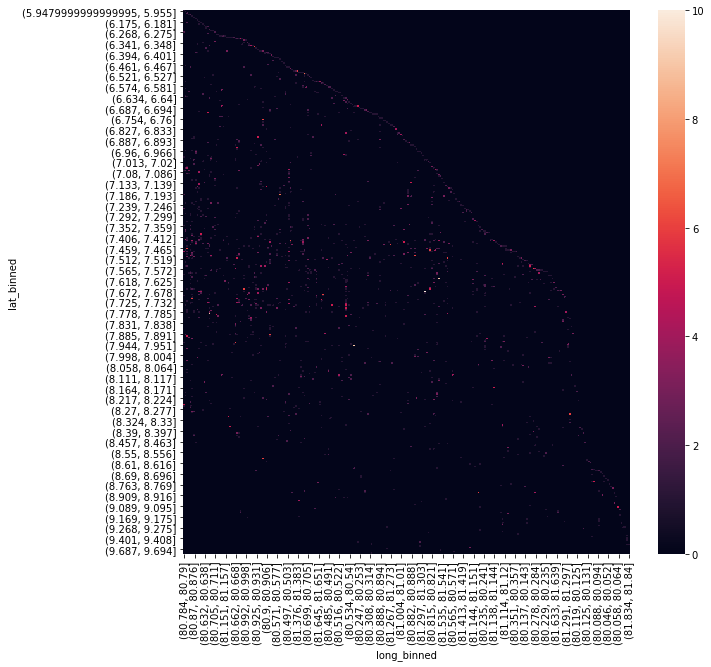

In [0]:
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(dataframe.groupby(['lat_binned', 'long_binned']).size().unstack(fill_value=0));

In [0]:
dataFrame = dataframe.copy()

In [0]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

